# Facebook AX 

In [1]:
!pip3 install ax-platform  # all systems

     |████████████████████████████████| 704 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 13.2 MB 46.2 MB/s eta 0:00:01
     |████████████████████████████████| 395 kB 47.7 MB/s eta 0:00:01
     |████████████████████████████████| 286 kB 10.1 MB/s eta 0:00:01


     |██████████████████████████████▍ | 764.3 MB 1.2 MB/s eta 0:00:33     |█▎                              | 31.1 MB 1.8 MB/s eta 0:07:19     |█▎                              | 33.2 MB 1.5 MB/s eta 0:08:27     |█▎                              | 33.3 MB 1.5 MB/s eta 0:08:27     |█▍                              | 36.2 MB 1.1 MB/s eta 0:11:35     |█▉                              | 45.9 MB 1.9 MB/s eta 0:06:49     |█▉                              | 47.0 MB 1.7 MB/s eta 0:07:22     |██                              | 48.8 MB 1.1 MB/s eta 0:11:12     |██▎                             | 57.6 MB 1.1 MB/s eta 0:11:38     |██▎                             | 57.7 MB 1.1 MB/s eta 0:11:38     |██▊                             | 68.2 MB 1.4 MB/s eta 0:08:29     |██▊                             | 68.5 MB 1.2 MB/s eta 0:10:23     |██▉                             | 71.1 MB 1.4 MB/s eta 0:08:51     |███▏                            | 79.9 MB 1.5 MB/s eta 0:08:01     |███▌                            | 88.4 MB

     |████████████████████████████████| 804.1 MB 9.5 kB/s eta 0:00:01     |██████████████████████████████▋ | 768.0 MB 1.4 MB/s eta 0:00:26     |██████████████████████████████▉ | 775.9 MB 2.2 MB/s eta 0:00:13     |███████████████████████████████ | 779.5 MB 1.5 MB/s eta 0:00:17     |███████████████████████████████▎| 787.3 MB 2.5 MB/s eta 0:00:07     |███████████████████████████████▋| 795.4 MB 1.7 MB/s eta 0:00:06     |███████████████████████████████▊| 796.7 MB 1.7 MB/s eta 0:00:05     |████████████████████████████████| 803.8 MB 2.4 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=bae87b38e5d84bee70347291f1192ef67fe1f2feaa85bcfea9dcad890c7643c6
  Stored in directory: /home/maoj/.cache/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
  Created wheel for gpytorch: filename=gpytorch-1.4.0-py2.py3-none-any.whl size=477847 sha256=4bdf04db4cf567b524d56aeb0071cfba43cb235d3116eac08b720c98f193b28e
  Stored in directory:

In [5]:
import numpy as np
from ax import optimize
from sklearn.feature_selection import mutual_info_regression

In [10]:
def numpy_normal(s1,s2):
    #s1,s2 = X
    x = np.random.normal(0, s1, size=10_000)
    y = np.random.normal(0, s2, size=10_000)

    out = x+y
    I = mutual_info_regression(x.reshape((-1,1)),out, discrete_features=False)[0]
    return I

In [11]:
best_parameters, best_values, experiment, model = optimize(
    parameters=[
      {
        "name": "s1",
        "type": "range",
        "bounds": [0.1, 15*np.sqrt(3)],
      },
      {
        "name": "s2",
        "type": "range",
        "bounds": [0.1, 15*np.sqrt(3)],
      },
    ],
    # Booth function
    evaluation_function=lambda x: numpy_normal(x["s1"], x["s2"]),
    minimize=False,
)

[INFO 04-14 10:39:43] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter s1. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 04-14 10:39:43] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter s2. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 04-14 10:39:43] ax.modelbridge.dispatch_utils: Using Bayesian Optimization generation strategy: GenerationStrategy(name='Sobol+GPEI', steps=[Sobol for 5 trials, GPEI for subsequent trials]). Iterations after 5 will take longer to generate due to  model-fitting.
[INFO 04-14 10:39:43] ax.service.managed_loop: Started full optimization with 20 steps.
[INFO 04-14 10:39:43] ax.service.managed_loop: Running optimization trial 1...
[INFO 04-14 10:39:43] ax.service.managed_loop: Running optimization tri

In [12]:
best_values

({'objective': 5.572930904710196},
 {'objective': {'objective': 0.0004841464887405486}})

In [14]:
optimize(
    parameters=[
      {
        "name": "s1",
        "type": "range",
        "bounds": [0.1, 15*np.sqrt(3)],
      },
      {
        "name": "s2",
        "type": "range",
        "bounds": [0.1, 15*np.sqrt(3)],
      },
    ],
    # Booth function
    evaluation_function=lambda x: np.log(x["s1"]),
    minimize=False,
)

[INFO 04-14 11:53:38] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter s1. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 04-14 11:53:38] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter s2. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 04-14 11:53:38] ax.modelbridge.dispatch_utils: Using Bayesian Optimization generation strategy: GenerationStrategy(name='Sobol+GPEI', steps=[Sobol for 5 trials, GPEI for subsequent trials]). Iterations after 5 will take longer to generate due to  model-fitting.
[INFO 04-14 11:53:38] ax.service.managed_loop: Started full optimization with 20 steps.
[INFO 04-14 11:53:38] ax.service.managed_loop: Running optimization trial 1...
[INFO 04-14 11:53:38] ax.service.managed_loop: Running optimization tri

({'s1': 25.980762113533157, 's2': 4.808907594567698},
 ({'objective': 3.2576690657056586},
  {'objective': {'objective': 1.4447972950564361e-05}}),
 SimpleExperiment(None),
 <ax.modelbridge.torch.TorchModelBridge at 0x7f2648069a00>)

In [66]:
from zoopt import Dimension, ValueType, Dimension2, Objective, Parameter, ExpOpt

def normal(X, db_size=2, rng=None):
    db_size = len(X)//2
    
    if rng == None:
        rng = np.random
    db = np.empty(db_size, dtype=object)
    for i in range(db_size):
        db[i] = rng.normal(X[i], X[i+db_size], 10_000)
    
    out = sum(db)/db_size
    
    return -mutual_info_regression(db[0].reshape((-1,1)), out, discrete_features=False, random_state=rng)[0]

def sphere_continuous_sre(f, db_size):
    """
    Example of minimizing high-dimensional sphere function with sequential random embedding.

    :return: no return value
    """
    sigmaBounds = [0.1, 15*np.sqrt(3)]
    muBounds = [10,100]

    dim_size = db_size*2  # dimensions
    dim_regs = [muBounds] * db_size + [sigmaBounds] * db_size  # dimension range
    dim_tys = [True] * dim_size  # dimension type : real
    dim = Dimension(dim_size, dim_regs, dim_tys)  # form up the dimension object
    # dim = Dimension2([(ValueType.CONTINUOUS, [-1, 1], 1e-6)]*dim_size)
    objective = Objective(f, dim)  # form up the objective function

    # setup algorithm parameters
    budget = 2000  # number of calls to the objective function
    parameter = Parameter(budget=budget, high_dim_handling=True, reducedim=True, num_sre=5, low_dimension=Dimension(10, [muBounds]*5 + [sigmaBounds] * 5, [True] * 10))

    solution_list = ExpOpt.min(objective, parameter, repeat=1, plot=True)

In [80]:
import pybobyqa
db_size = 500

f = lambda x: normal(x, db_size, np.random.RandomState(12345))

x0 = np.concatenate((np.random.uniform(muBounds[0], muBounds[1], db_size), np.random.uniform(sigmaBounds[0], sigmaBounds[1], db_size)))
lower_bounds = [muBounds[0]] * db_size + [sigmaBounds[0]]*db_size
upper_bounds = [muBounds[1]] * db_size + [sigmaBounds[1]]*db_size
soln = pybobyqa.solve(f, x0, bounds=(lower_bounds, upper_bounds))

/home/maoj/.local/lib/python3.8/site-packages/pybobyqa/solver.py:763: RuntimeWarning:

maxfun <= npt: Are you sure your budget is large enough?



In [81]:
print(soln)

****** Py-BOBYQA Results ******
Solution xmin = [24.36713522 48.56339487 98.2152935  47.72129628 34.44064227 91.41127682
 81.51286272 21.38104298 36.61683965 20.01817259 73.54097568 89.6725017
 51.90151899 61.59594595 61.00138459 92.94993343 15.99445745 32.29164255
 24.88241    79.27240186 15.05398315 91.33836591 53.35169893 27.24664201
 52.21240898 91.38561686 67.20795232 35.88167988 19.07015671 73.34349391
 73.50645485 56.18327621 32.33827618 81.99189521 46.34416841 86.85072149
 42.96394853 96.78705541 32.40567752 29.2812072  64.47714647 98.61323744
 43.28703637 19.20298923 95.8741374  89.07581248 57.00948763 23.16428161
 96.26718114 84.12654096 11.74376522 85.68548532 50.05246127 24.35226317
 48.16584195 73.49153986 37.14034163 48.19854751 23.14371496 85.16385314
 91.80735909 17.17943001 61.11839358 24.67028127 16.74145496 90.44148746
 35.99203703 37.26871656 95.77223988 23.16887612 11.46505907 51.57687681
 37.90719795 38.23537915 36.14228448 46.42563765 35.45971426 12.92215421
 59.

[zoopt] sequential random embedding 0
[zoopt] sequential random embedding 1
[zoopt] sequential random embedding 2
[zoopt] sequential random embedding 3
[zoopt] sequential random embedding 4
[zoopt] x: array([ 0.19762069,  0.03507376,  0.13733184, ...,  0.26865947,
        0.05533593, -0.21349018])
[zoopt] value: 0.15336457560375588
[zoopt] The best solution is:
[zoopt] x: array([ 0.19762069,  0.03507376,  0.13733184, ...,  0.26865947,
        0.05533593, -0.21349018])
[zoopt] value: 0.15336457560375588


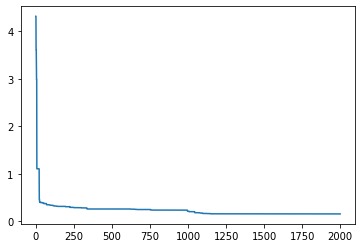

[zoopt] Best 1 result: 0.15336457560375588 +- 0.0


In [55]:
def sphere_sre(solution):
    """
    Variant of the sphere function. Dimensions except the first 10 ones have limited impact on the function value.
    """
    a = 0
    bias = 0.2
    x = solution.get_x()
    x1 = x[:10]
    x2 = x[10:]
    value1 = sum([(i-bias)*(i-bias) for i in x1])
    value2 = 1/len(x) * sum([(i-bias)*(i-bias) for i in x2])
    return value1 + value2

def sphere_continuous_sre():
    """
    Example of minimizing high-dimensional sphere function with sequential random embedding.

    :return: no return value
    """

    dim_size = 10000  # dimensions
    dim_regs = [[0, 1]] * dim_size  # dimension range
    dim_tys = [True] * dim_size  # dimension type : real
    #dim = Dimension(dim_size, dim_regs, dim_tys)  # form up the dimension object
    dim = Dimension2([(ValueType.CONTINUOUS, [0.5, 1], 1e-6)]*dim_size)
    objective = Objective(sphere_sre, dim)  # form up the objective function

    # setup algorithm parameters
    budget = 2000  # number of calls to the objective function
    parameter = Parameter(budget=budget, high_dim_handling=True, reducedim=True, num_sre=5, low_dimension=Dimension(10, [[0, 1]] * 10, [True] * 10))

    solution_list = ExpOpt.min(objective, parameter, repeat=1, plot=True)

sphere_continuous_sre()

In [118]:
from GPyOpt.methods import BayesianOptimization
db_size = 10

f = lambda x: normal(x, db_size, np.random.RandomState(12345))

domain = [
    {"name": "mu", "type": "continuous", "domain": muBounds, "dimensionality": db_size},
    {"name": "std", "type": "continuous", "domain": sigmaBounds, "dimensionality": db_size}
]

f_new = lambda x: f(x[0])
Bopt = BayesianOptimization(f=f_new, 
                            domain=domain,
                            initial_design_numdata = 5,   # Number data initial design
                            exact_feval = True,
                            acquisition_type ='EI',       # LCB acquisition
                           )   # Exploration exploitation)

#Bopt.run_optimization(max_iter = 20, eps=1e-8)
#print(Bopt.fx_opt)
x0 = [muBounds[0]] * db_size + [sigmaBounds[0]]*db_size


for vai in range(db_size):
    i = db_size-vai
    print(i)
    
    # Fix every other parameters than does for our interesting distribution
    cont = {}
    for j in range(db_size):
        if j == i:
            continue
        cont[f"mu_{j+1}"] = x0[j]
        cont[f"std_{j+1}"] = x0[j+db_size]
    Bopt.run_optimization(max_iter = 20, eps=1e-8, context=cont)  
    print(Bopt.fx_opt)

10


ValueError: not enough values to unpack (expected 2, got 0)

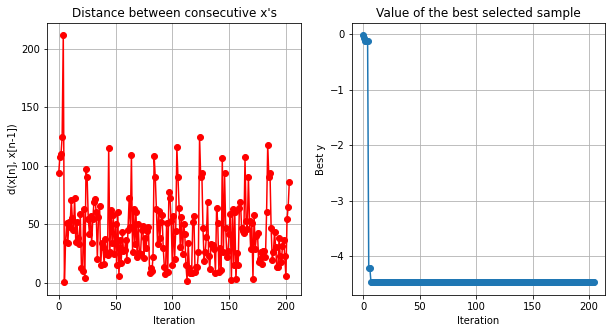

In [115]:
Bopt.plot_convergence()

In [106]:
Bopt.x_opt

array([96.14462647, 92.7210301 , 71.72909519, 79.20231411, 98.02772843,
       23.05934627, 59.78469879, 42.84844716, 85.32968223, 72.06745423,
       25.98076211,  8.95901151,  9.04976161,  6.74750874,  8.07656973,
        3.82455638,  0.82973749, 13.50661766, 14.15223081, 17.68033531])